## MODELOS EPIDEMIOLÓGICOS SIR Y SEIR
### Simulación y casos
By: Fabio Pinto
###### (Susceptibles, expuestos, infectados, recuperados)


Uno de los modelos epidemilógicos más usados es el denominado modelo SIR, que fue propuesto por **W. O. Kermack y A. G. McKendrick en 1927**.

***En una población de tamaño fijo N en la que se ha desatado una epidemia que se propaga mediante contagio, en un tiempo t los individuos pueden estar en tres estados distintos:***

+ susceptibles S(t),
+ infectados I(t),
+ recuperados R(t)

Wang, y otros (2020) han optado por un modelo evolucionado del SIR, el **SEIR**
, que dio resultados aceptables en el caso del Ébola en 2004 (Chowell, Hengartnet, Castillo-Chavez, Fenimore, & Hyman, 2004) en el que ***se incluye a la población infectada pero que no infecta a otros (Expuestos)***, donde ahora N=S+E+I+R.



Referencias:

+ Qianying Lin, Shi Zhao, Daozhou Gao, Yijun Lou, Shu Yang, Salihu S. Musa, Maggie H. Wang, Yongli Cai, Weiming Wang, Lin Yang, Daihai He, A conceptual model for the coronavirus disease 2019 (COVID-19) outbreak in Wuhan, China with individual reaction and governmental action, International Journal of Infectious Diseases 93 (2020), 211–216. Publicado: March 04, 2020. https://www.ijidonline.com/article/S1201-9712(20)30117-X/fulltext

+ Gutierrez and Varona, 2020. Universidad De La Rioja. [online] Análisis de la posible evolución de la epidemia de coronavirus COVID-19 por medio de un modelo SEIR. Publicado: March 15, 2020. <https://www.unirioja.es/apnoticias/servlet/Archivo?C_BINARIO=12051> [Accessed 13 April 2020].


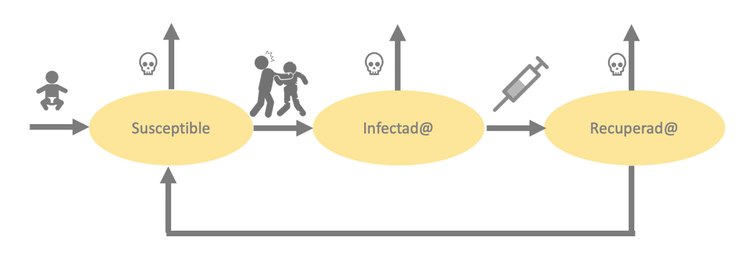

In [252]:
from IPython.display import Image
Image(filename='data/sir.png')

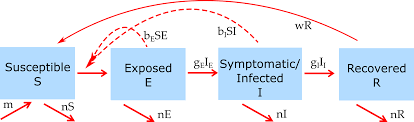

In [253]:
Image(filename='data/seir.png')

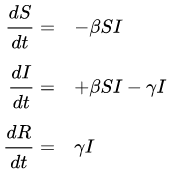

In [254]:
from IPython.display import Image
Image(filename='data/edosir.png')

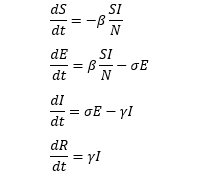

In [255]:
Image(filename='data/edoseir.png')

- Beta: Tasa de infeccion
- Gamma: Tasa de recuperación 
+ Ommega: Tasa de incubación

In [115]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Resolución de las ecuaciones diferenciales

In [95]:
## Definimos las ecuaciones diferenciales del modelo
def odeSIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [94]:
def odeSEIR(y, t, N, beta, gamma, omega):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - omega*E
    dIdt = omega*E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

## Modelado y simulación del modelo SIR 

In [200]:
def modeloSIR(N, beta, gamma, days):
    """N = total population"""
    """# Initial number of infected and recovered individuals, I0 and R0."""
    I0, R0 = 1, 0
    ## S is the habs that are susceptibles
    S0 = N - I0 - R0
    ## beta = ratio of contact between people
    ## gamma = inverse of the days of recuperation  
    # A grid of time points (in days)
    t = range(0,days)
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = spi.odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return S, I, R 

## Modelado y simulación del modelo SEIR 

In [256]:
def modeloSEIR(N, beta, gamma, omega, days):
    """N = total population"""
    """# Initial number of infected and recovered individuals, I0 and R0."""
    I0, R0, E0 = 1, 0, 0
    ## S is the habs that are susceptibles
    S0 = N - I0 - R0- E0
    ## beta = ratio of contact between people
    ## gamma = inverse of the days of recuperation  
    # A grid of time points (in days)
    t = range(0,days)
    # Initial conditions vector
    y0 = S0, E0,I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = spi.odeint(odeSEIR, y0, t, args=(N, beta, gamma, omega))
    S, E, I, R = ret.T

    return S, E, I, R 

## Función para hacer un breve resumen de los datos

In [184]:
def informeSIR(d):
    mean = int(np.mean(d))
    maxx = int(np.max(d))
    max_day = d.argmax()
    print('Promedio Diario = ' + str(mean))
    print('Máxima tasa  = ' + str(maxx))
    print('Dia del pico = ' + str(max_day))

### 'Aplanar la curva': Modelo SIR con diferentes medidas de contención 

In [228]:
def plotsir(S,I,R):
    t = range(0,len(S))
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
#     plt.plot(t, E/1000, 'c', alpha=0.5, lw=2, label='Exposed')
    plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    plt.xlabel('Time /days')
    plt.ylabel('Number (1000s)')
    plt.title('SIR model')
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = plt.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()

In [285]:
def plotseir(S,E,I,R):
    t = range(0,len(S))
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    plt.plot(t, E/1000, 'c', alpha=0.5, lw=2, label='Exposed')
    plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    plt.xlabel('Time /days')
    plt.ylabel('Number (1000s)')
    plt.title('SIR model')
    plt.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = plt.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()

#### La presencia o no de medidas de contención (aislamiento, cuarentena, etc) determinan la variación de la tasa de contagio
Para el ejemplo estamos tomando un beta de 2.5 inicial para ausencia de medidas de contención y 0.5 para medidas de contención serias. 

In [303]:
S_1, I_1, R_1 = modeloSIR(1e5,2.5,1/5,100)  # sin ninguna medida de contención 
S_2, I_2, R_2 = modeloSIR(1e5,1.5,1/5,100) # con medidas de contención leves 
S_3, I_3, R_3 = modeloSIR(1e5,0.5,1/5,100) # con medidas de contención fuertes 


**Modelo SIR con beta = 2.5**

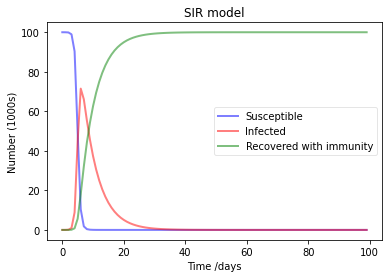

In [304]:
plotsir(S_1,I_1,R_1)

**Modelo SIR con beta = 1.5**

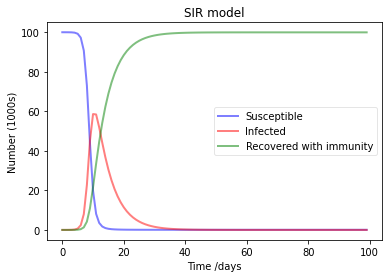

In [305]:
plotsir(S_2,I_2,R_2)

**Modelo SIR con beta = 0.5**

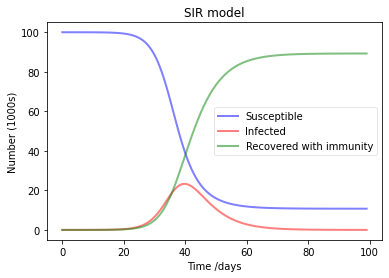

In [306]:
plotsir(S_3,I_3,R_3)

**Comparación de curvas de infectados con diferentes medidas de contención** 

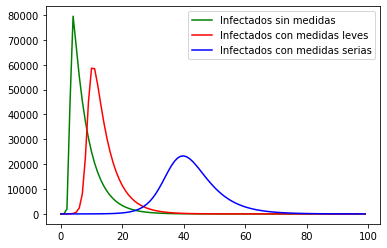

In [245]:
t = range(0,len(I_1))
plt.plot(t, I_1, 'g', label = 'Infectados sin medidas')
plt.plot(t, I_2, 'r', label = 'Infectados con medidas leves')
plt.plot(t, I_3, 'b', label = 'Infectados con medidas serias')
plt.legend()
plt.show()

In [307]:
print("---------Infectados sin medidas-----------")
informeSIR(I_1)
print("---------Infectados con medidas leves-----------")
informeSIR(I_2)
print("---------Infectados con medidas serias-----------")
informeSIR(I_3)

---------Infectados sin medidas-----------
Promedio Diario = 5000
Máxima tasa  = 71489
Dia del pico = 6
---------Infectados con medidas leves-----------
Promedio Diario = 4997
Máxima tasa  = 58608
Dia del pico = 10
---------Infectados con medidas serias-----------
Promedio Diario = 4462
Máxima tasa  = 23330
Dia del pico = 40


**Comparación de curvas de recuperados con diferentes medidas de contención** 

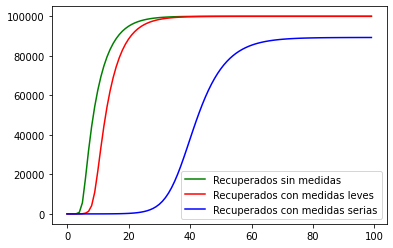

In [308]:
t = range(0,len(I_1))
plt.plot(t, R_1, 'g', label = 'Recuperados sin medidas')
plt.plot(t, R_2, 'r', label = 'Recuperados con medidas leves')
plt.plot(t, R_3, 'b', label = 'Recuperados con medidas serias')
plt.legend()
plt.show()

**Comparación de curvas de susceptibles con diferentes medidas de contención** 

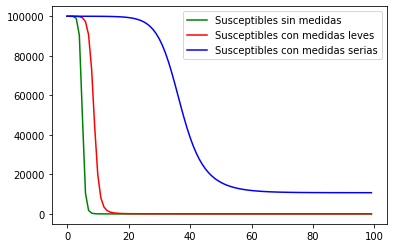

In [297]:
t = range(0,len(S_1))
plt.plot(t, S_1, 'g', label = 'Susceptibles sin medidas')
plt.plot(t, S_2, 'r', label = 'Susceptibles con medidas leves')
plt.plot(t, S_3, 'b', label = 'Susceptibles con medidas serias')
plt.legend()
plt.show()

### 'Aplanar la curva': Modelo SEIR con diferentes medidas de contención

In [272]:
S1, E1, I1, R1 = modeloSEIR(1e5,2.5,1/5,1/7,200)  # sin ninguna medida de contención 
S2, E2, I2, R2 = modeloSEIR(1e5,1.5,1/5,1/7,200) # con medidas de contención leves 
S3, E3, I3, R3 = modeloSEIR(1e5,0.5,1/5,1/7,200) # con medidas de contención fuertes 

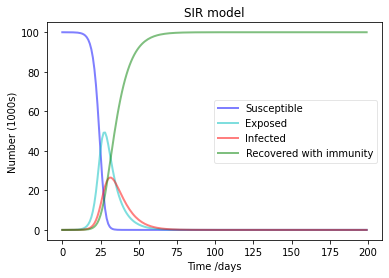

In [273]:
plotseir(S1, E1, I1, R1)

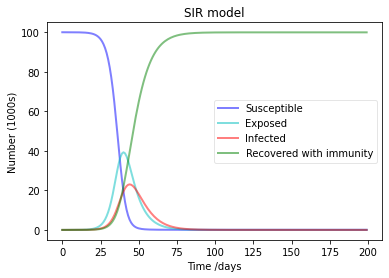

In [286]:
plotseir(S2, E2, I2, R2)

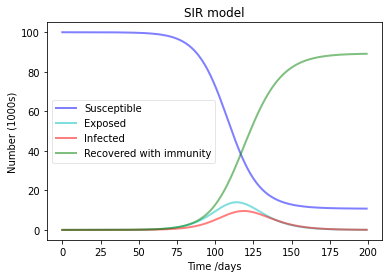

In [276]:
plotseir(S3, E3, I3, R3)

In [278]:
print("---------Infectados sin medidas-----------")
informeSIR(I1)
print("---------Infectados con medidas leves-----------")
informeSIR(I2)
print("---------Infectados con medidas serias-----------")
informeSIR(I3)

---------Infectados sin medidas-----------
Promedio Diario = 2499
Máxima tasa  = 26478
Dia del pico = 31
---------Infectados con medidas leves-----------
Promedio Diario = 2498
Máxima tasa  = 23033
Dia del pico = 44
---------Infectados con medidas serias-----------
Promedio Diario = 2227
Máxima tasa  = 9578
Dia del pico = 119


In [287]:
print("---------Expuestos sin medidas-----------")
informeSIR(E1)
print("---------Expuestos con medidas leves-----------")
informeSIR(E2)
print("---------Expuestos con medidas serias-----------")
informeSIR(E3)

---------Expuestos sin medidas-----------
Promedio Diario = 3499
Máxima tasa  = 49266
Dia del pico = 28
---------Expuestos con medidas leves-----------
Promedio Diario = 3498
Máxima tasa  = 39267
Dia del pico = 40
---------Expuestos con medidas serias-----------
Promedio Diario = 3121
Máxima tasa  = 14002
Dia del pico = 114


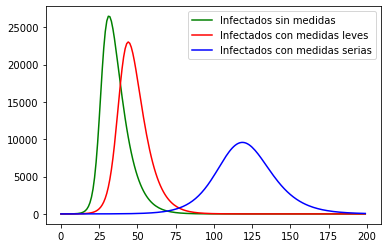

In [298]:
t = range(0,len(I1))
plt.plot(t, I1, 'g', label = 'Infectados sin medidas')
plt.plot(t, I2, 'r', label = 'Infectados con medidas leves')
plt.plot(t, I3, 'b', label = 'Infectados con medidas serias')
plt.legend()
plt.show()

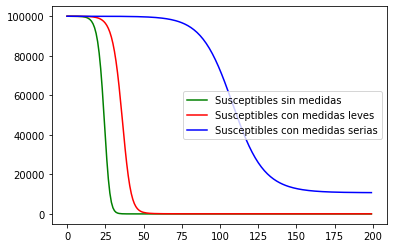

In [300]:
t = range(0,len(S1))
plt.plot(t, S1, 'g', label = 'Susceptibles sin medidas')
plt.plot(t, S2, 'r', label = 'Susceptibles con medidas leves')
plt.plot(t, S3, 'b', label = 'Susceptibles con medidas serias')
plt.legend()
plt.show()